In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('dataset/diabetes.csv')

class_0 = df[df.Diabetes_binary == 0]
class_1 = df[df.Diabetes_binary == 1]

class_0_downsampled = class_0.sample(len(class_1), random_state=42)

balanced_df = pd.concat([class_0_downsampled, class_1], axis=0)

X = balanced_df.drop("Diabetes_binary", axis=1)
y = balanced_df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

balanced_df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5185,0.0,0,0.0,1,29.0,0.0,0.0,0.0,1,0,1,0,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,11.0
200939,0.0,0,0.0,1,28.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,2.0,1.0,0.0,1,4,6.0,8.0
128506,0.0,0,0.0,1,27.0,1.0,0.0,0.0,1,1,1,1,1,0.0,3.0,6.0,0.0,0.0,0,8,6.0,9.0
371,0.0,0,1.0,0,21.0,0.0,0.0,0.0,0,0,0,0,1,0.0,4.0,0.0,30.0,1.0,0,12,6.0,6.0
7178,0.0,1,0.0,1,45.0,1.0,0.0,1.0,0,1,0,0,1,1.0,4.0,0.0,1.0,0.0,1,9,5.0,6.0


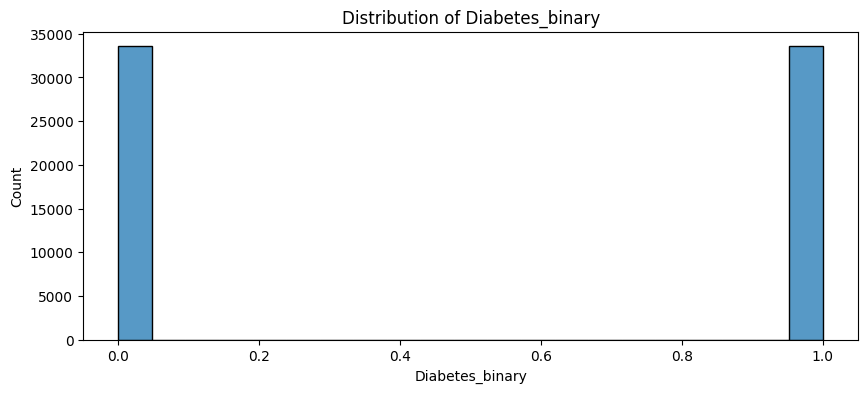

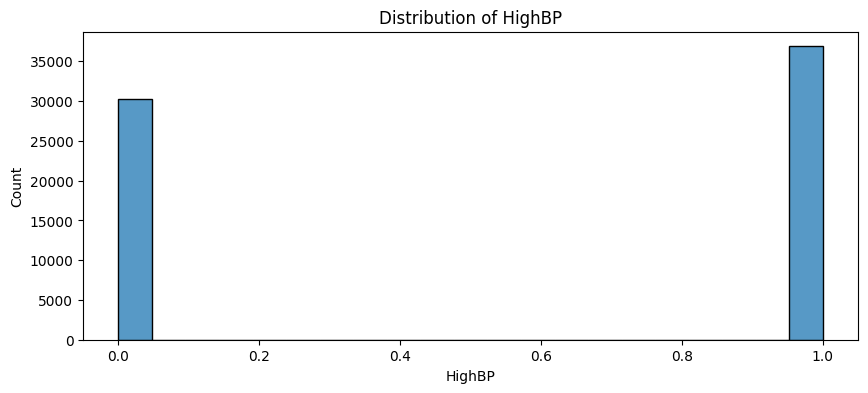

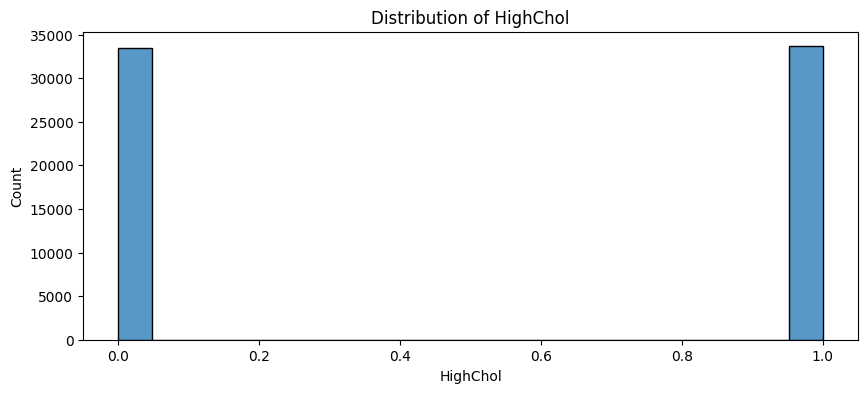

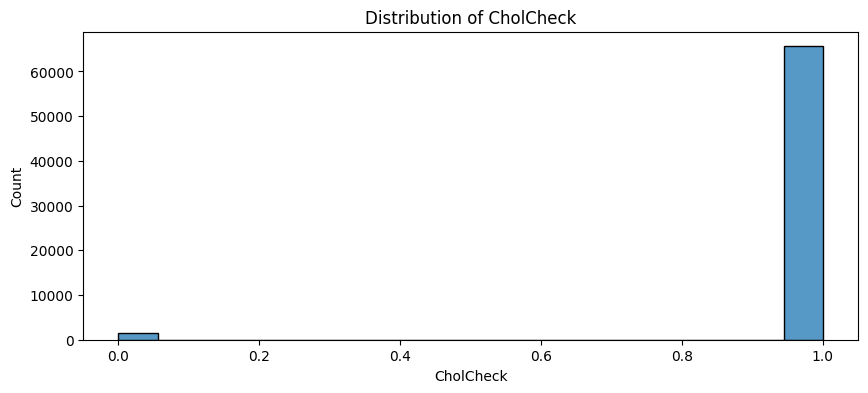

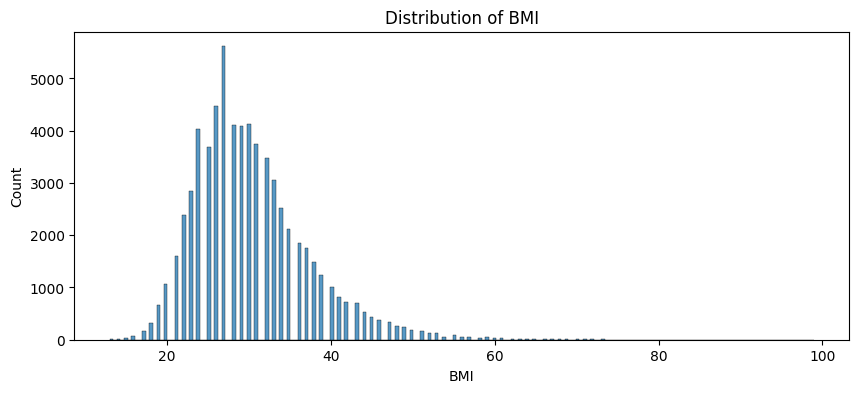

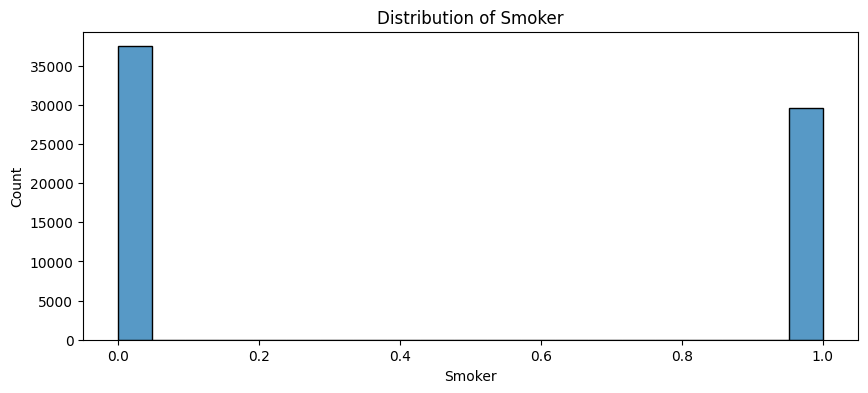

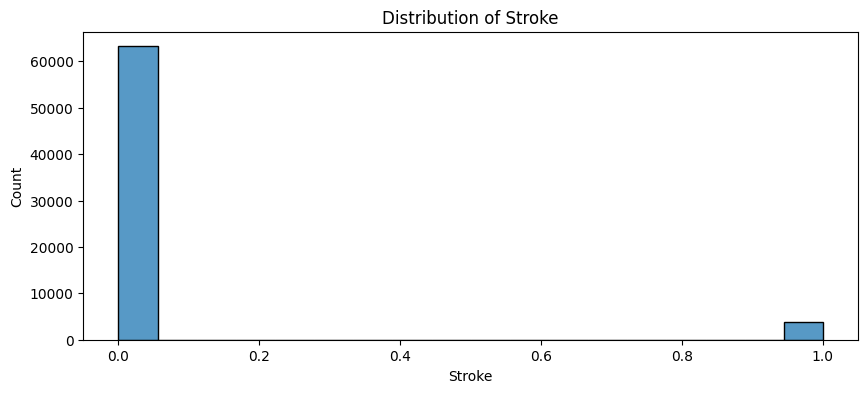

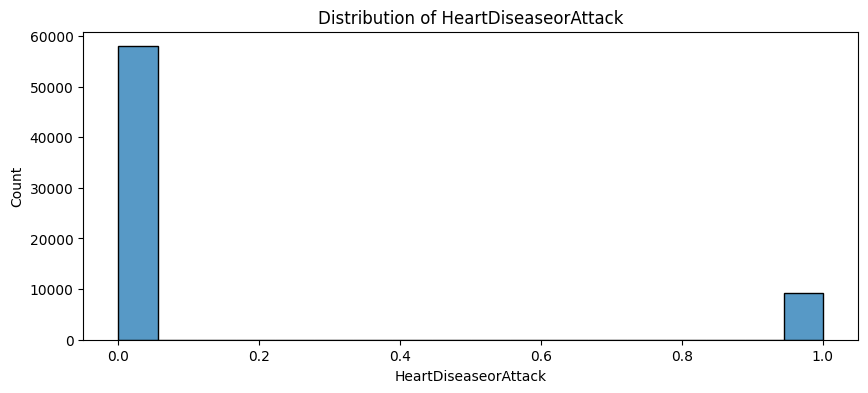

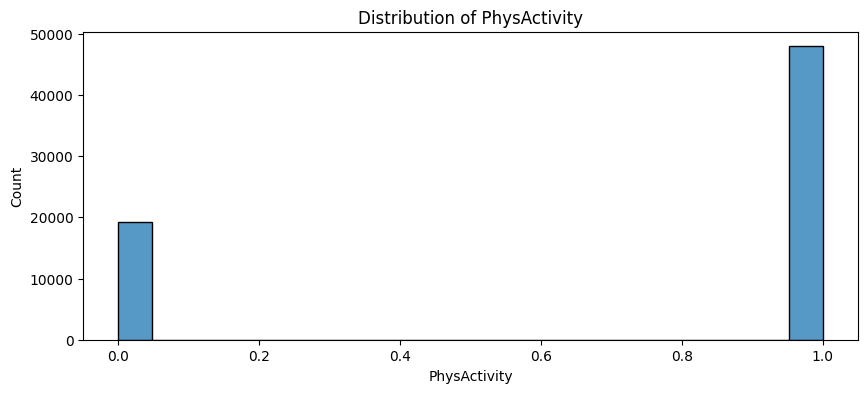

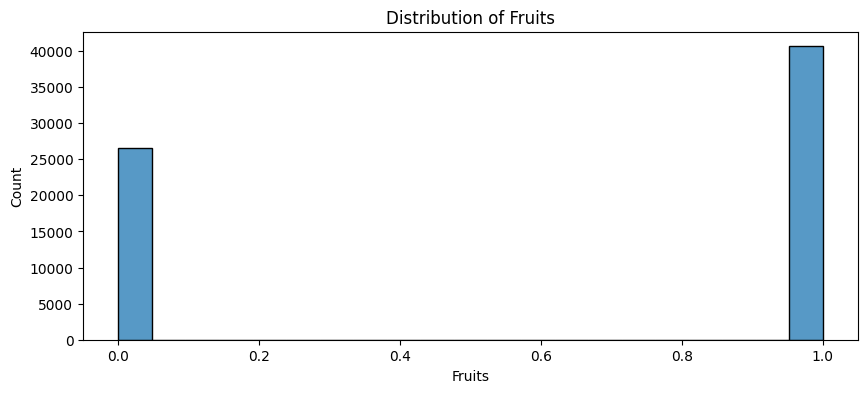

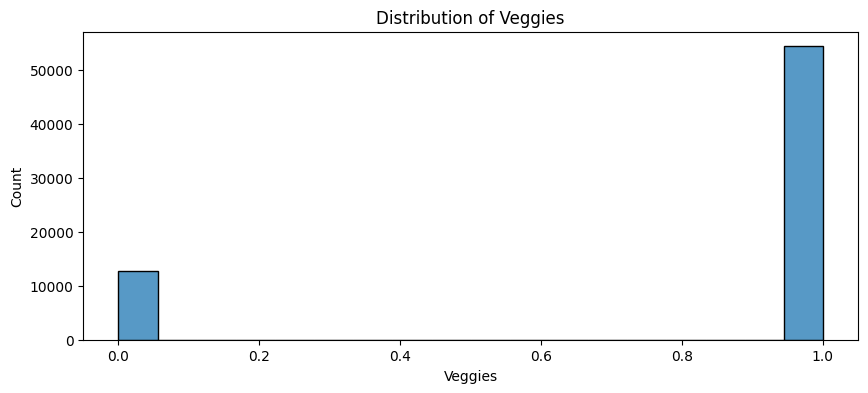

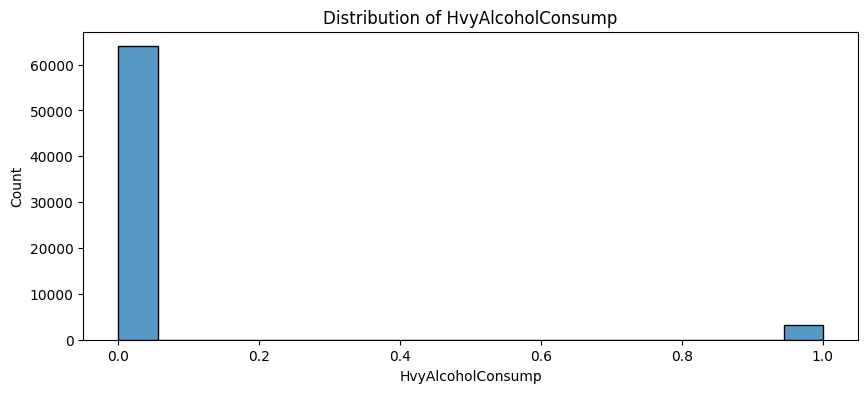

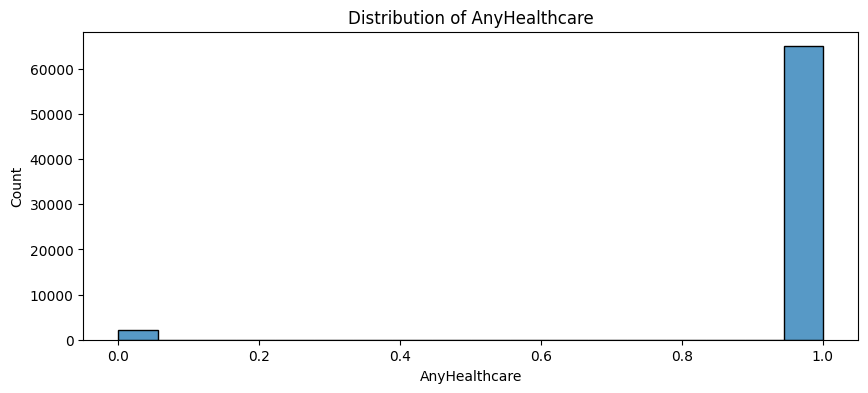

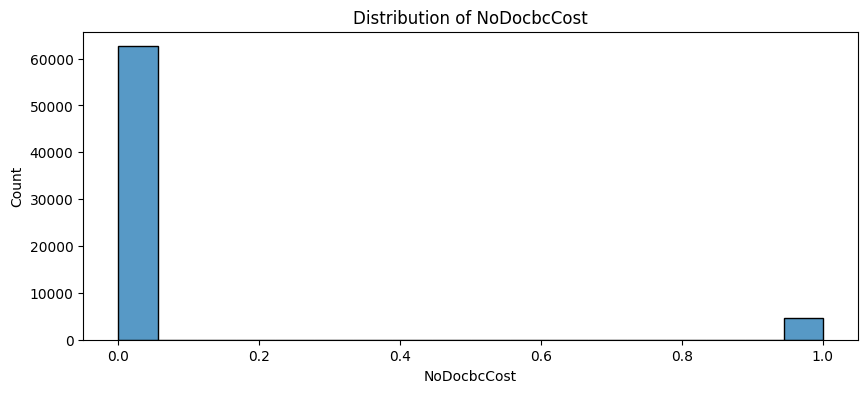

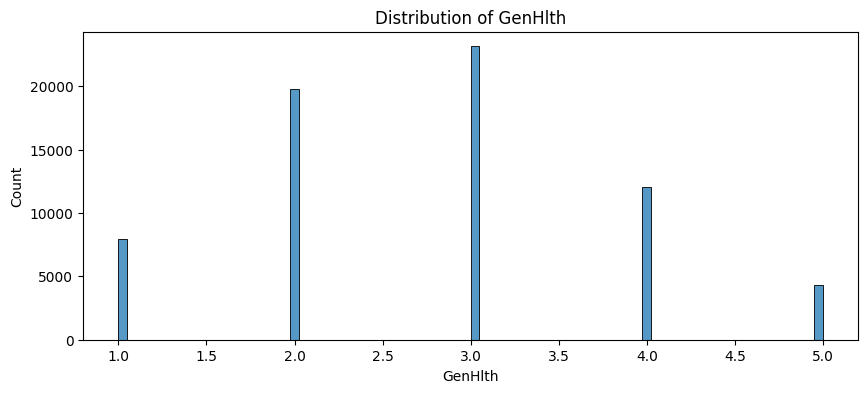

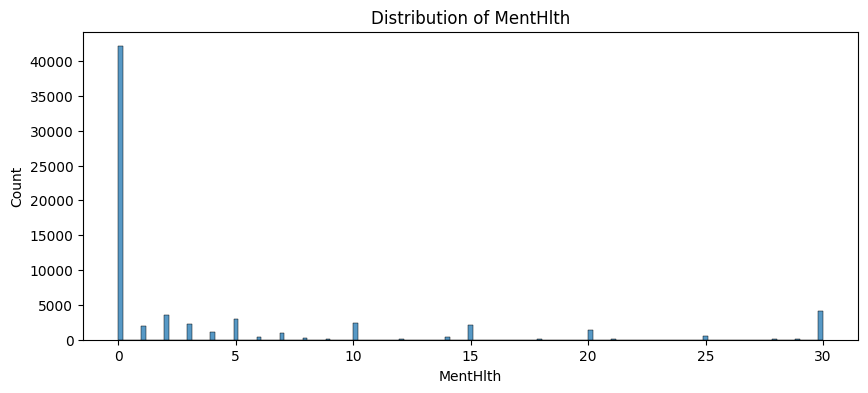

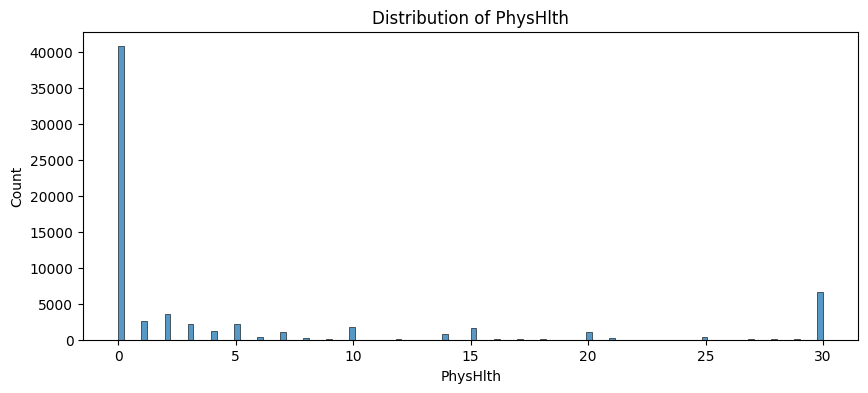

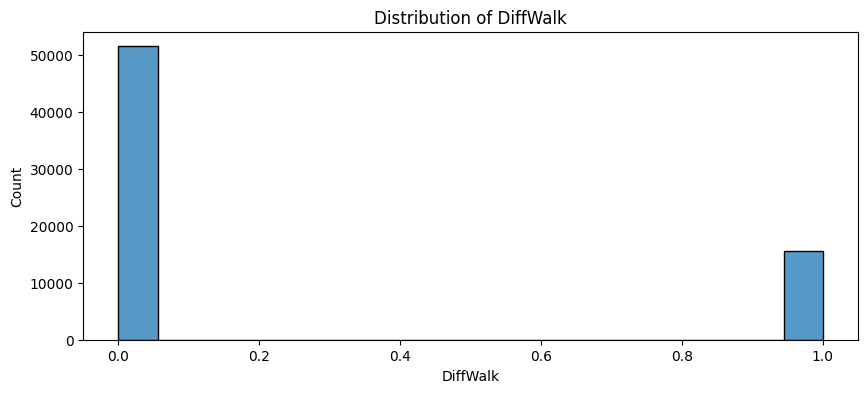

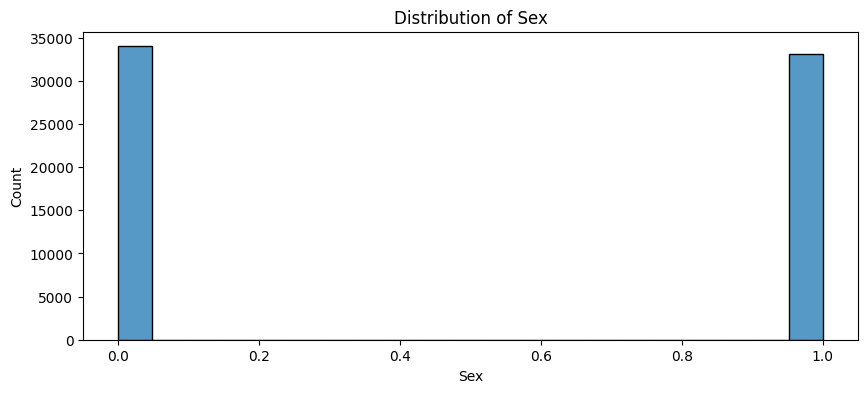

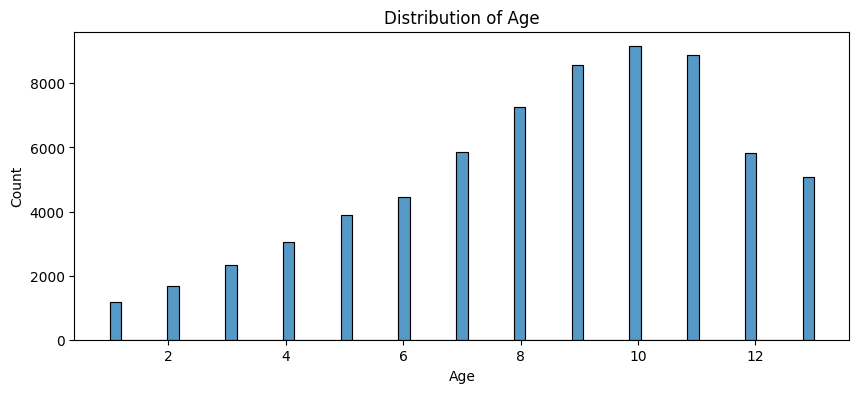

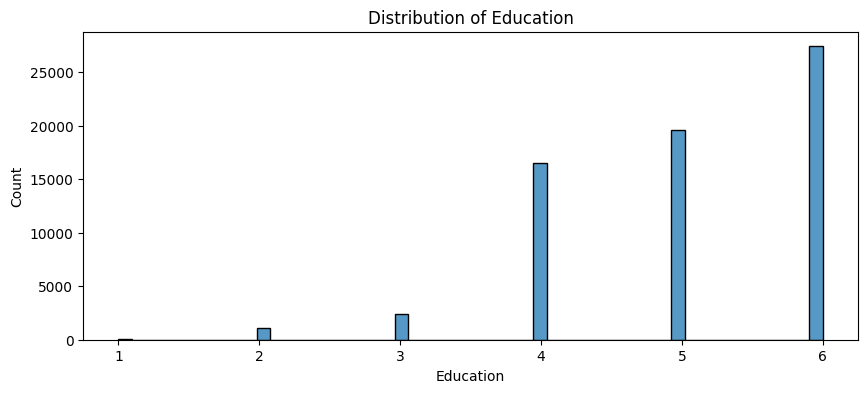

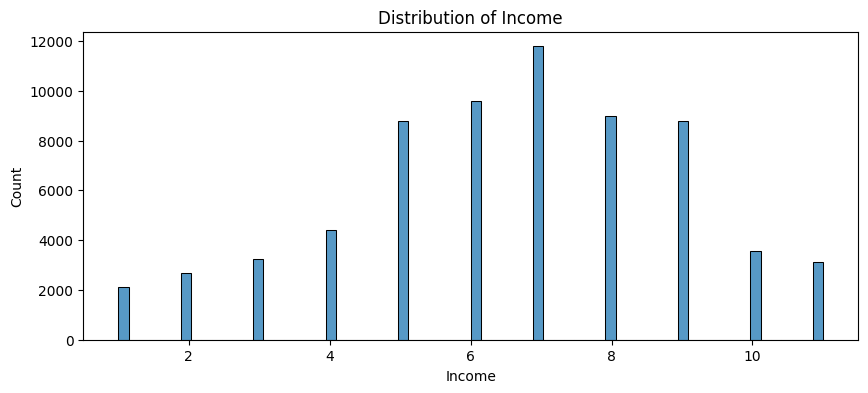

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
           'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
           'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
           'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

for column in columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(balanced_df[column], kde=False)
    plt.title(f'Distribution of {column}')
    plt.show()

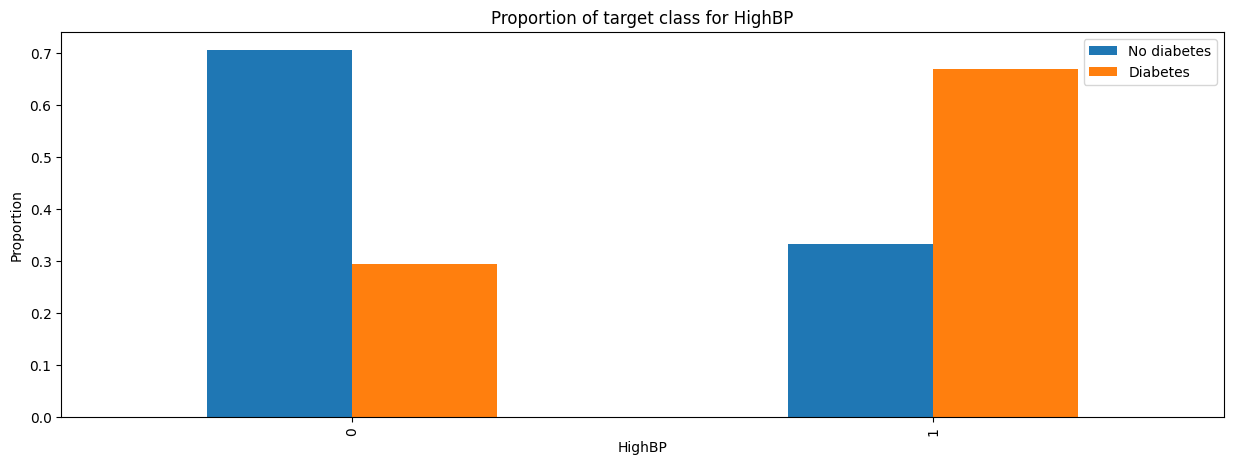

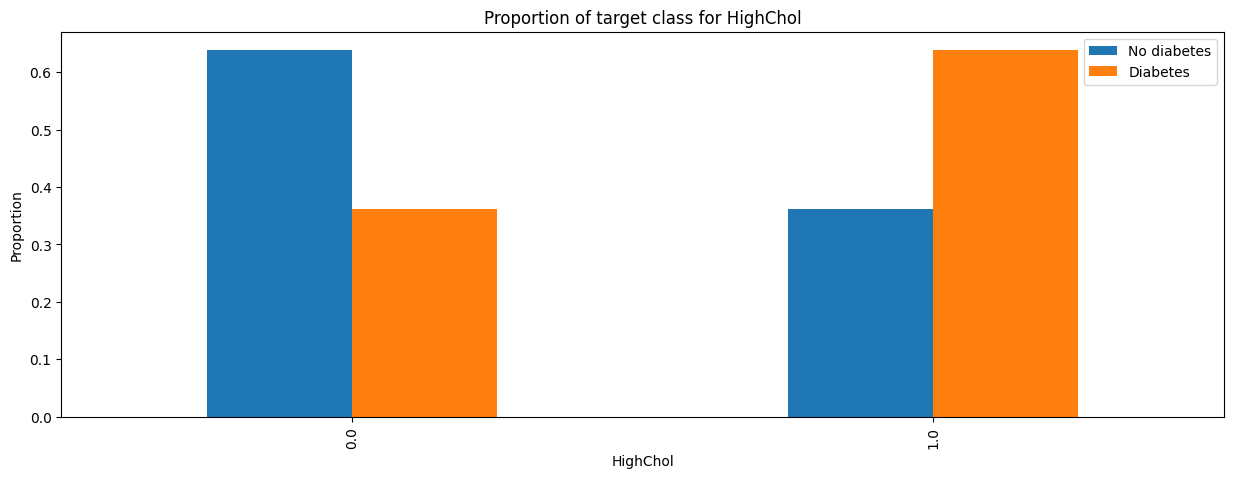

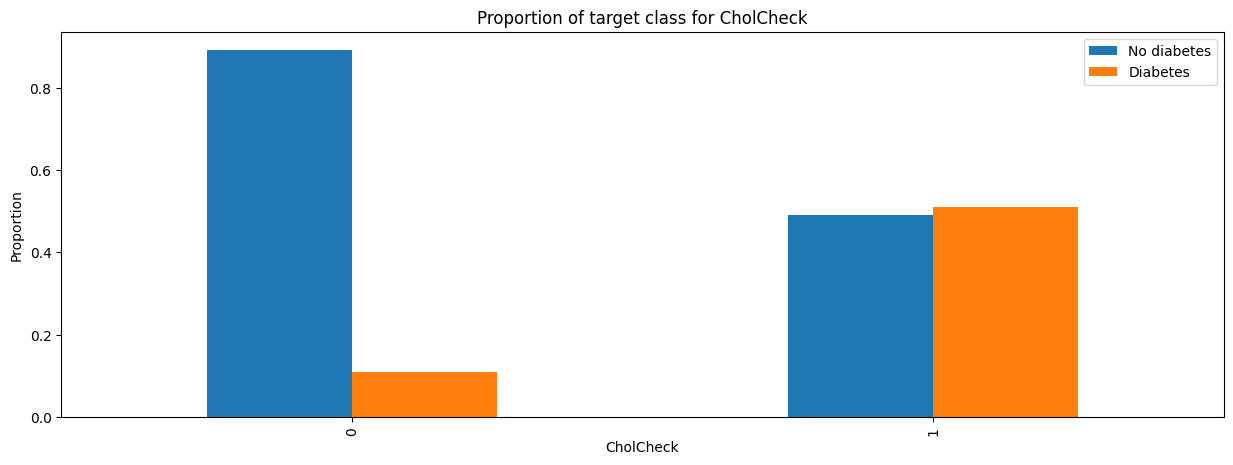

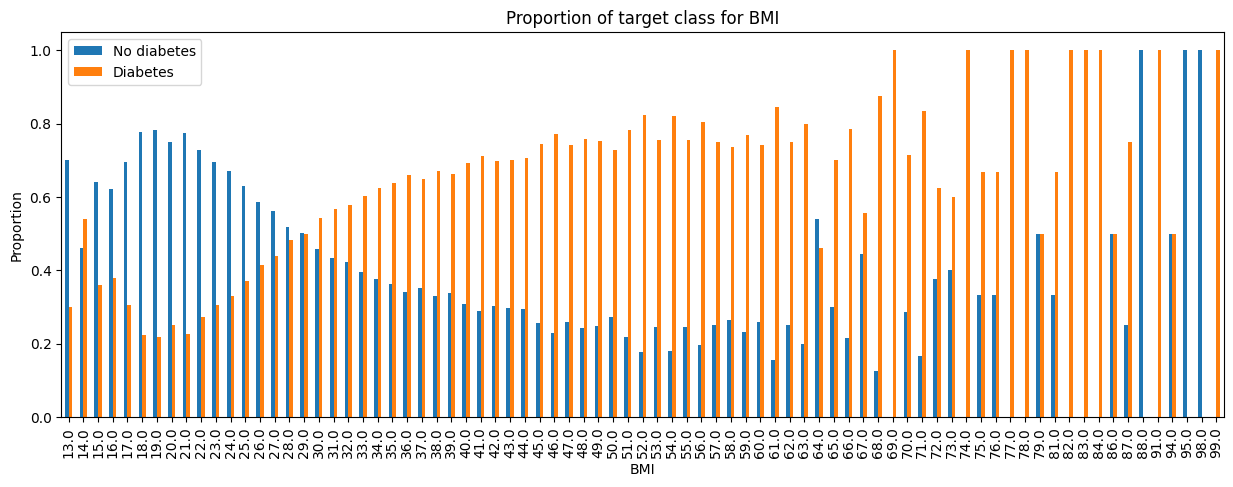

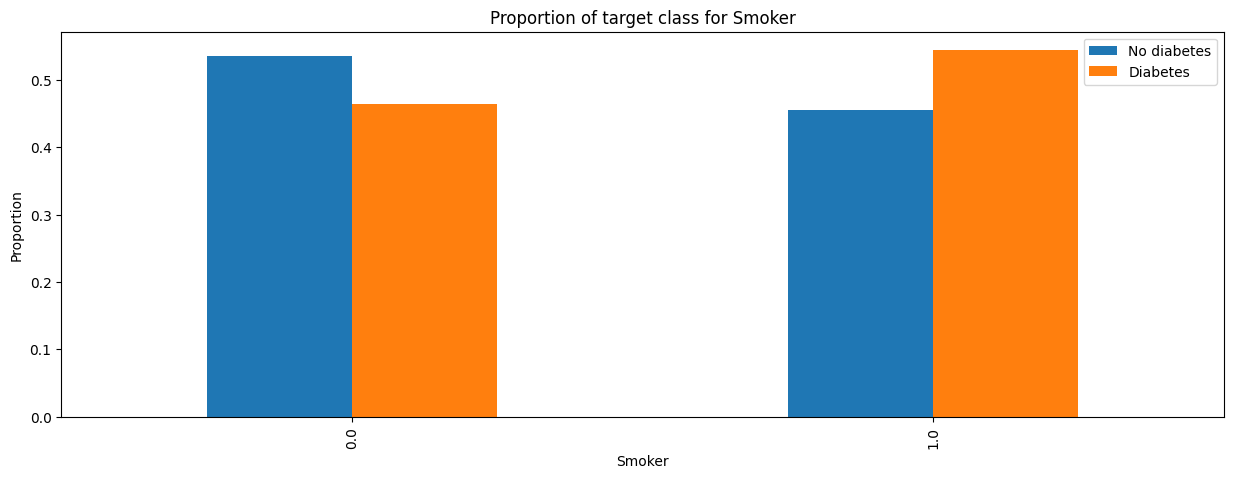

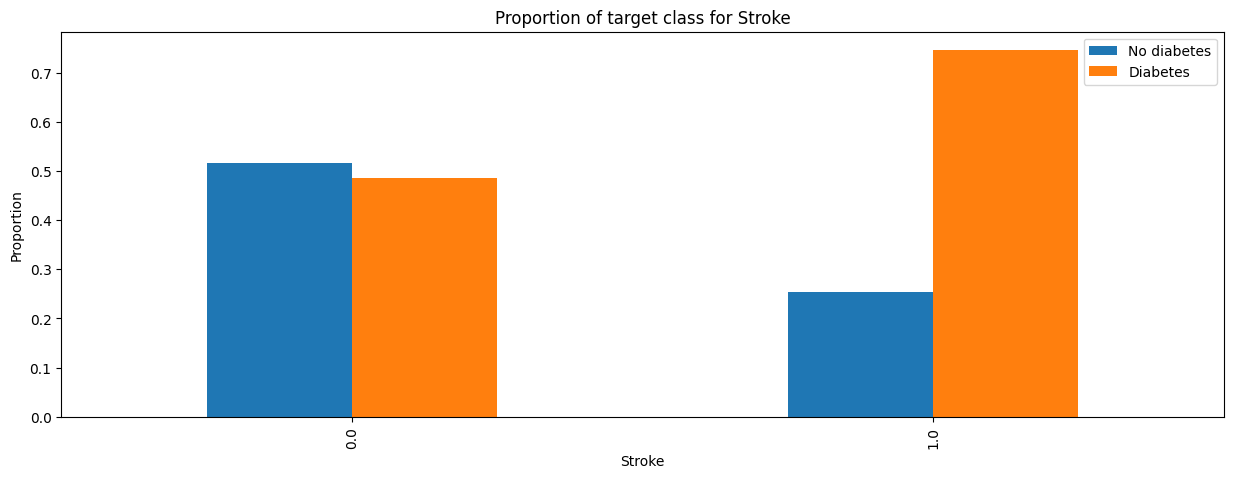

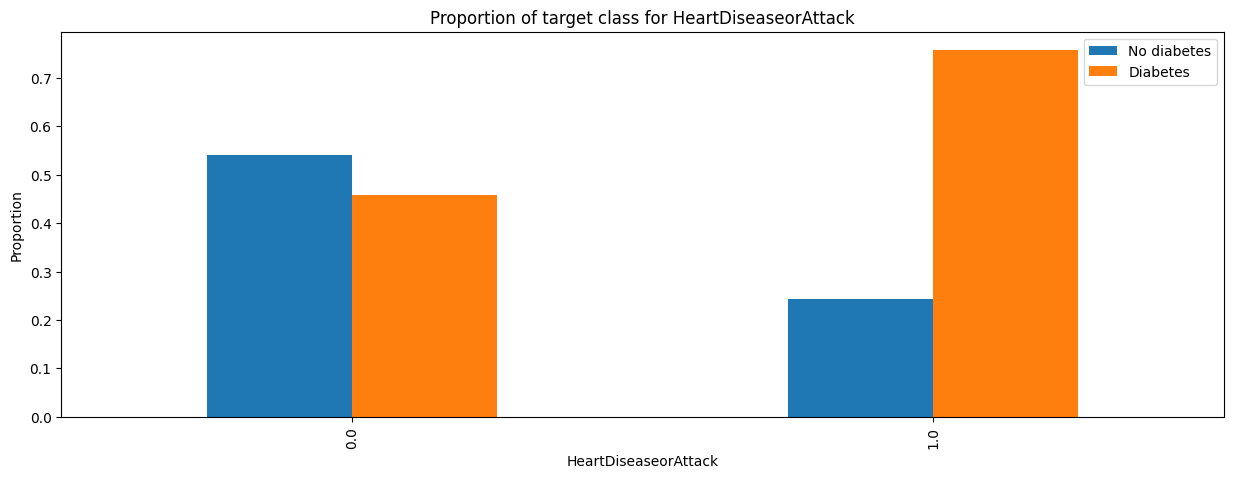

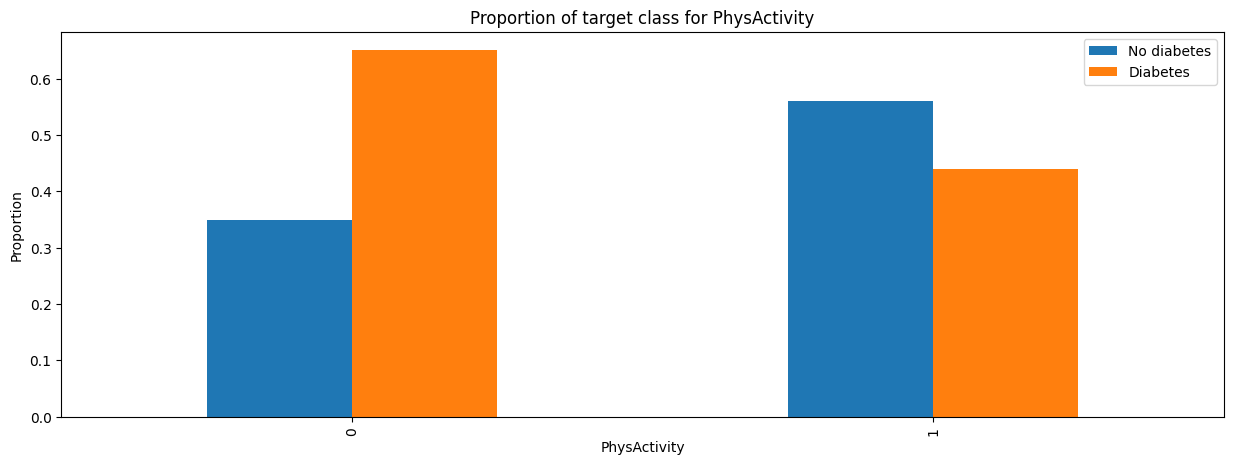

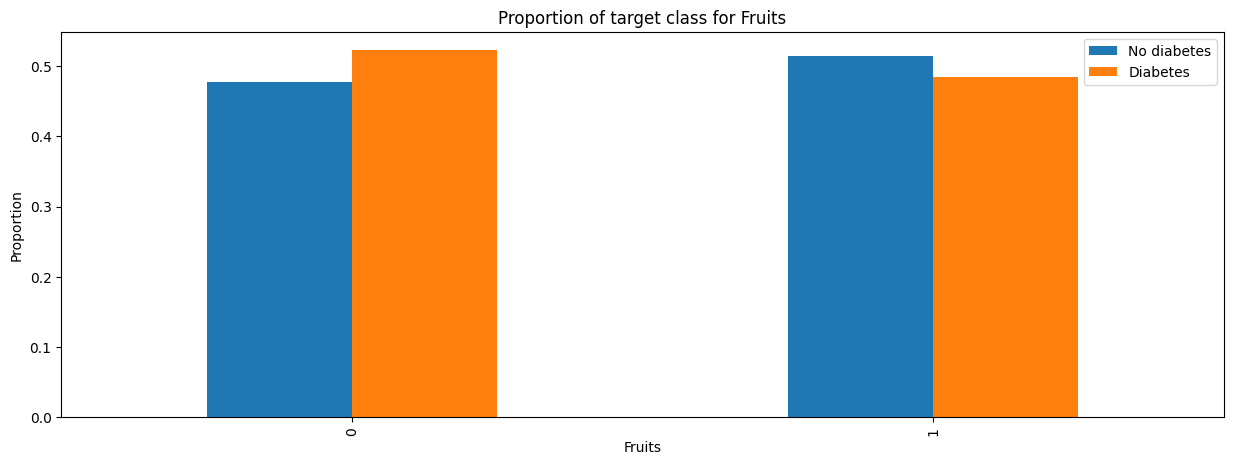

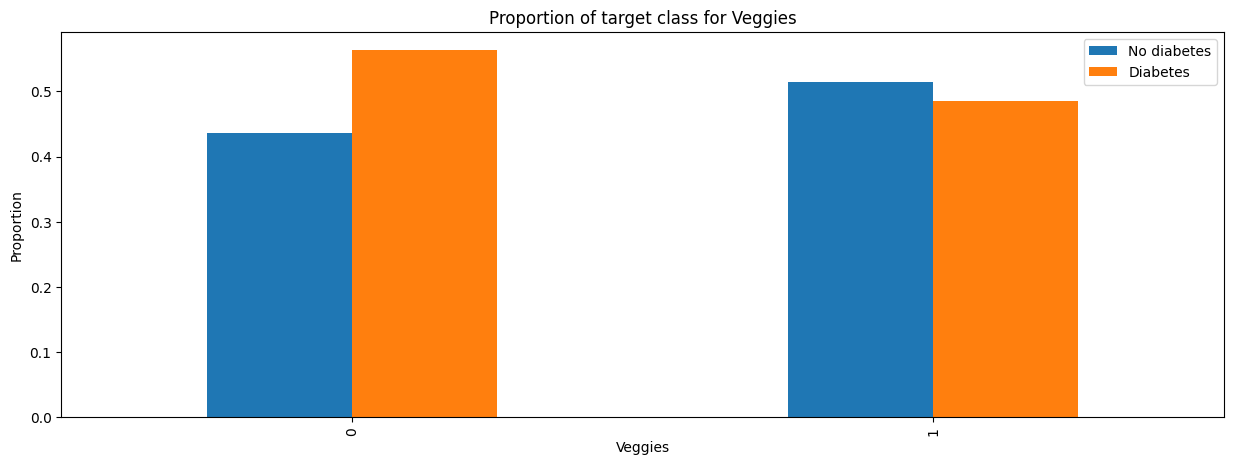

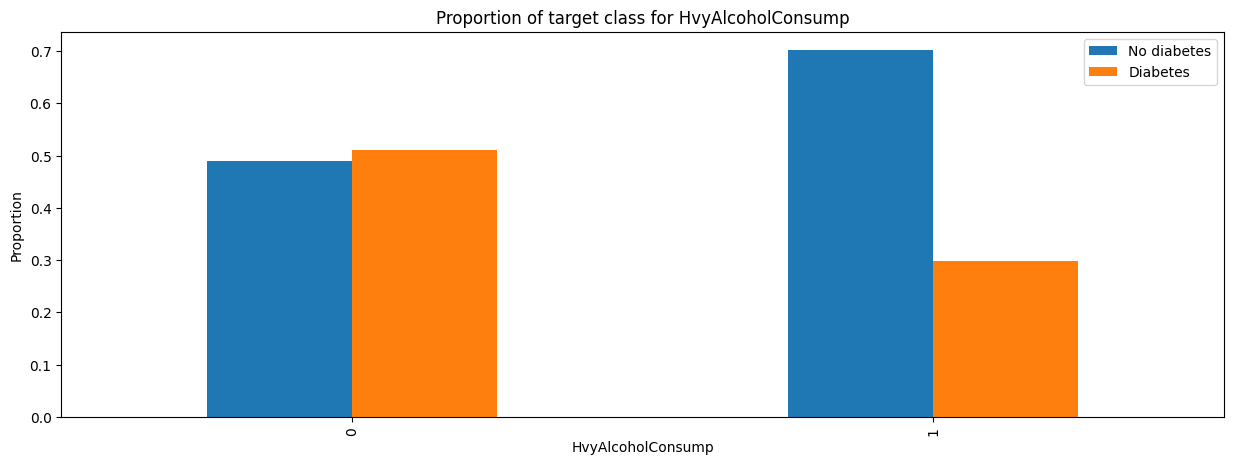

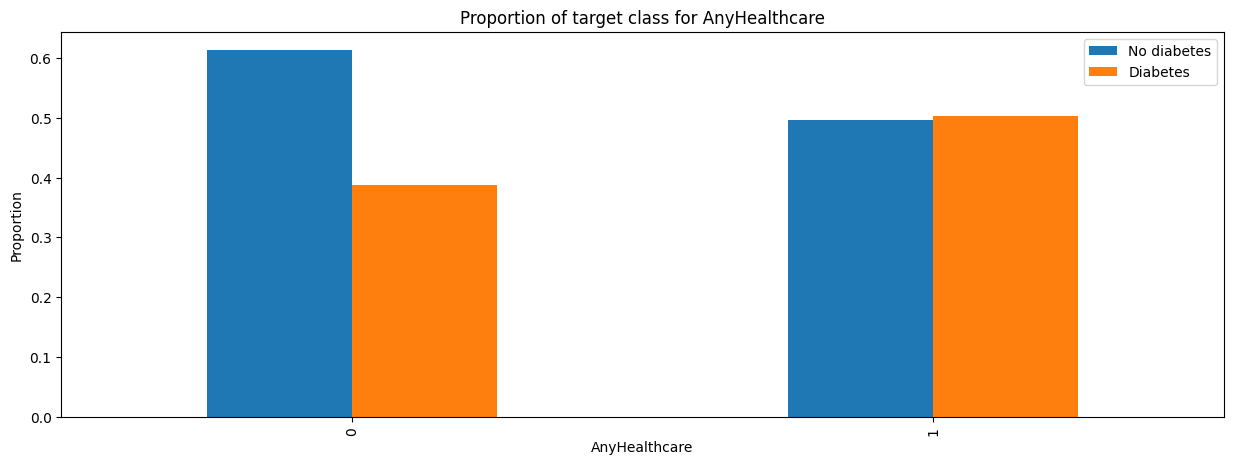

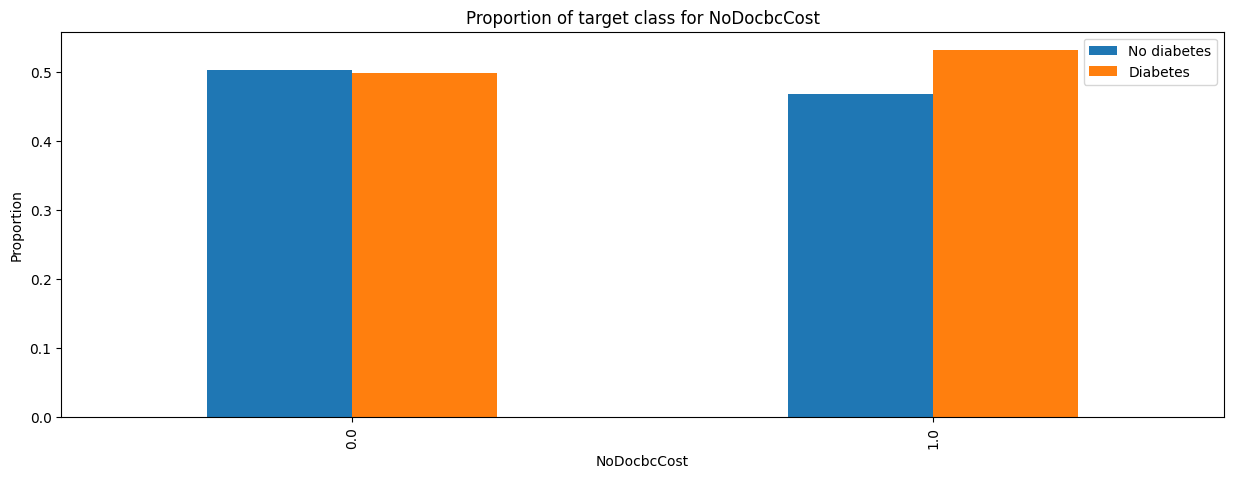

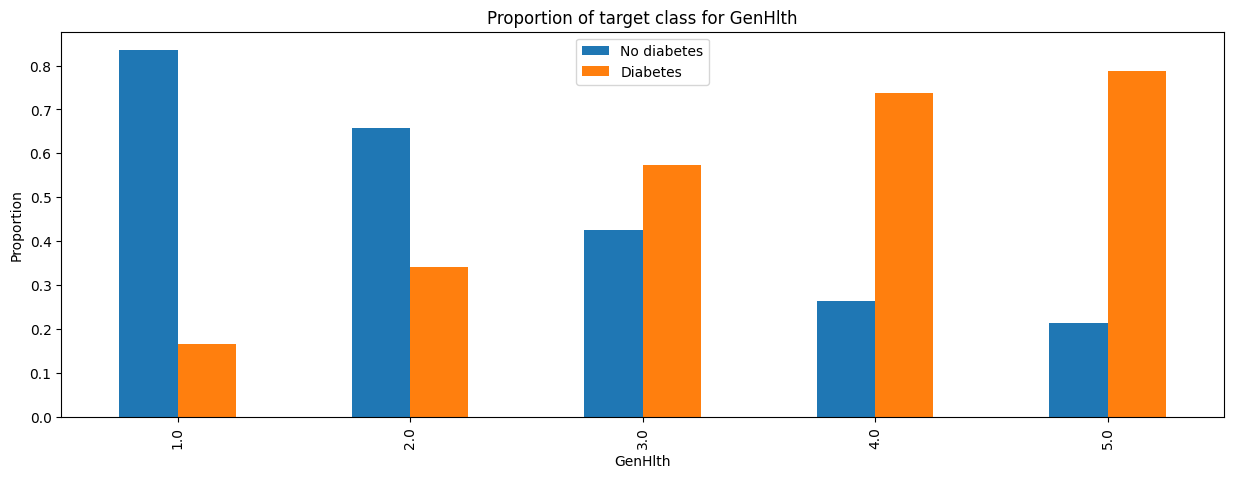

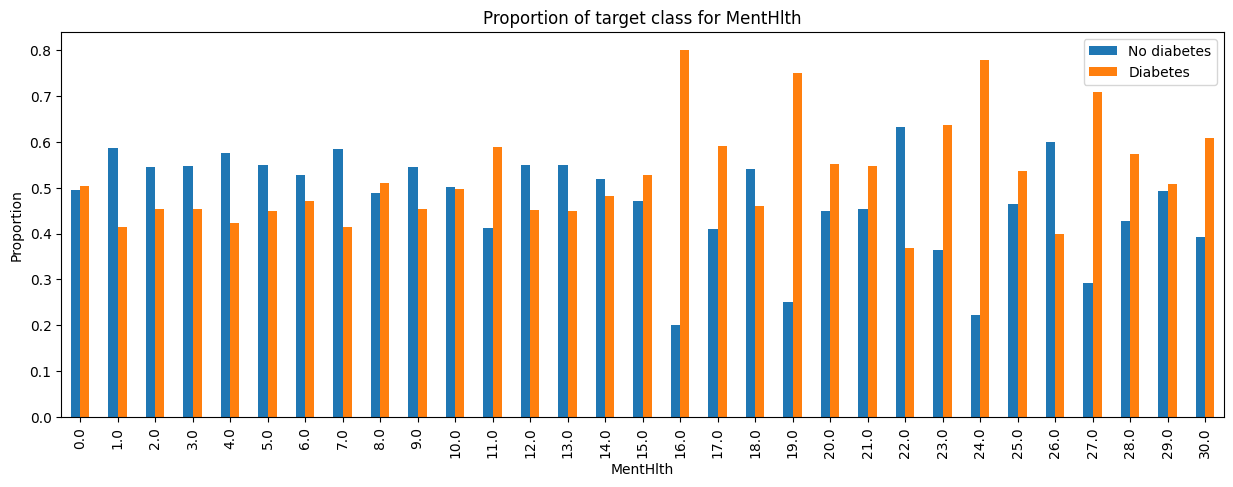

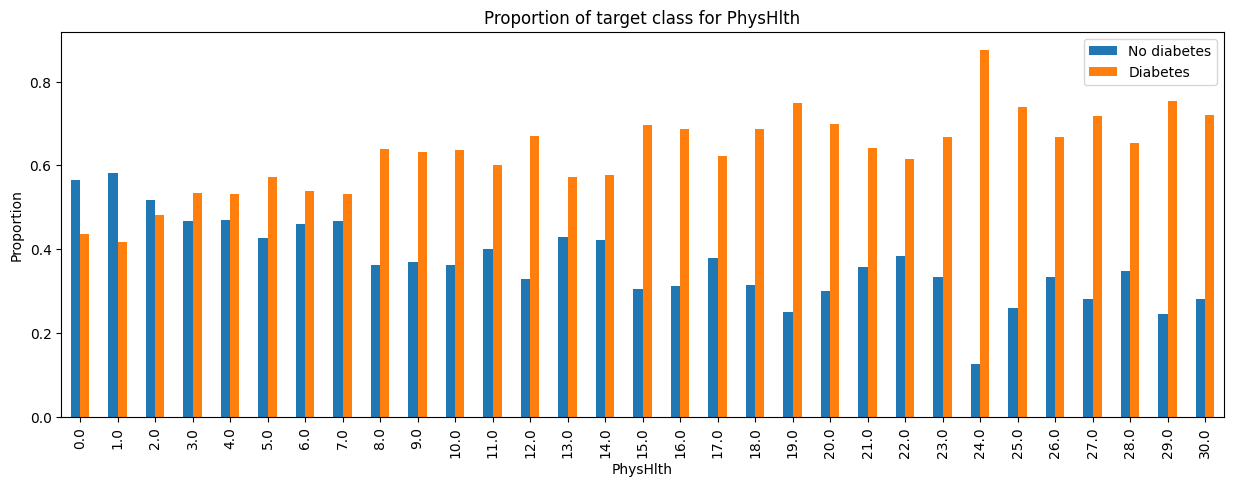

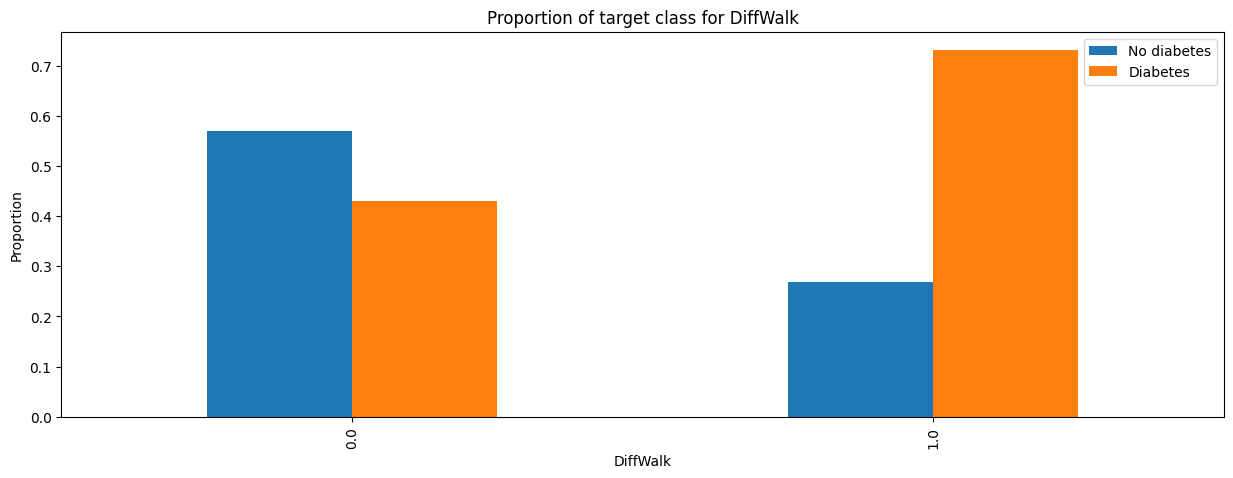

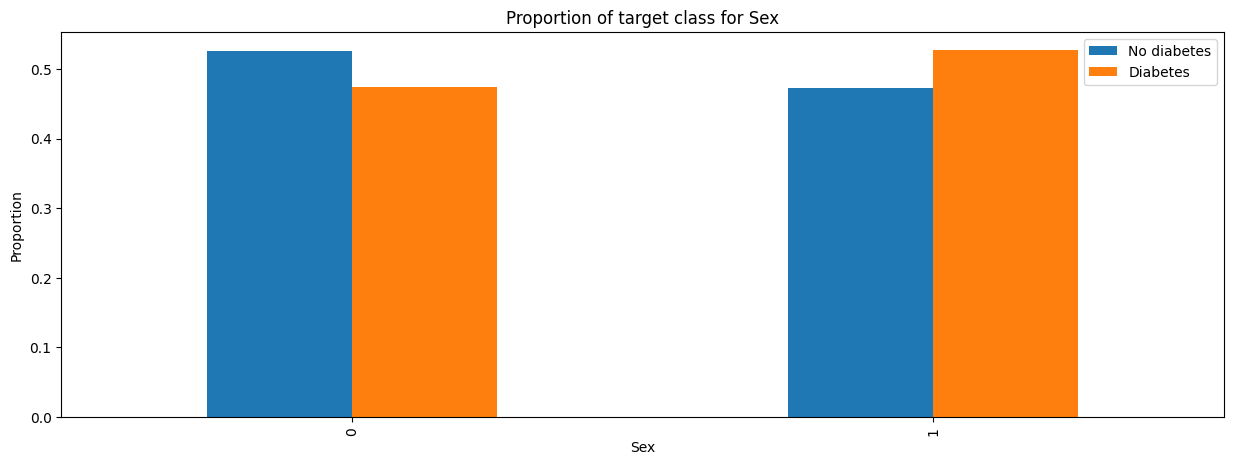

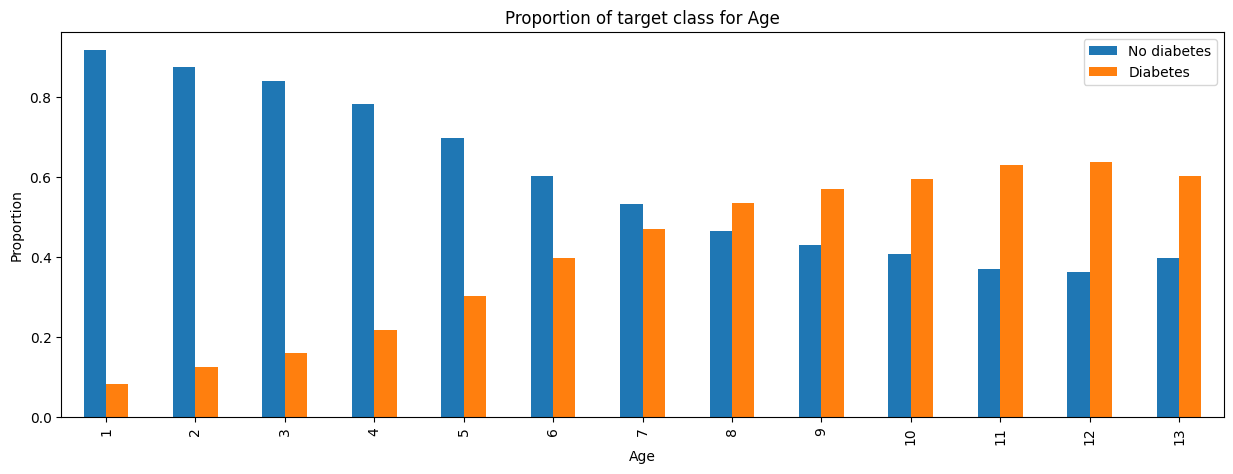

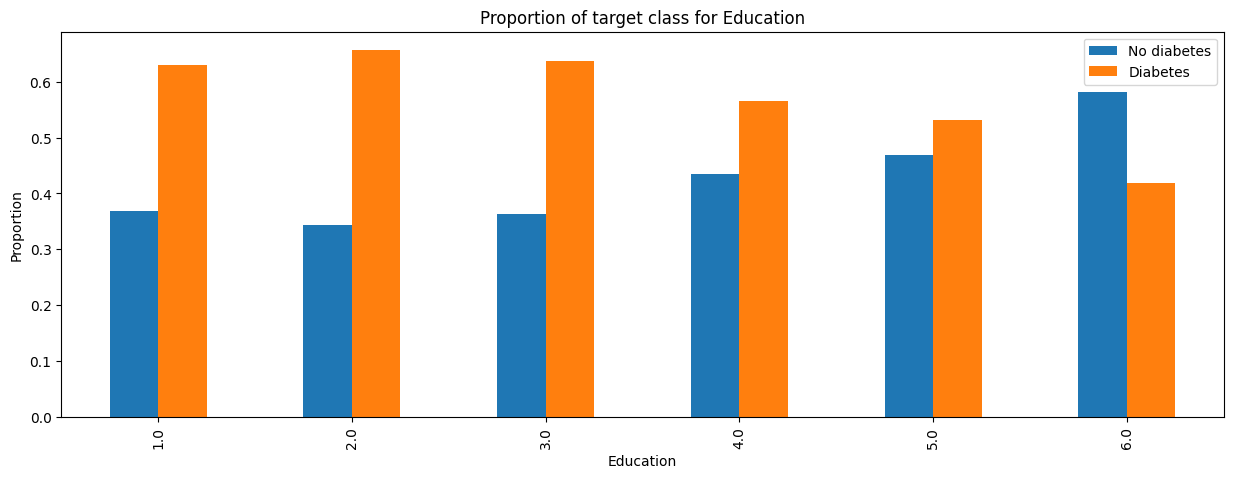

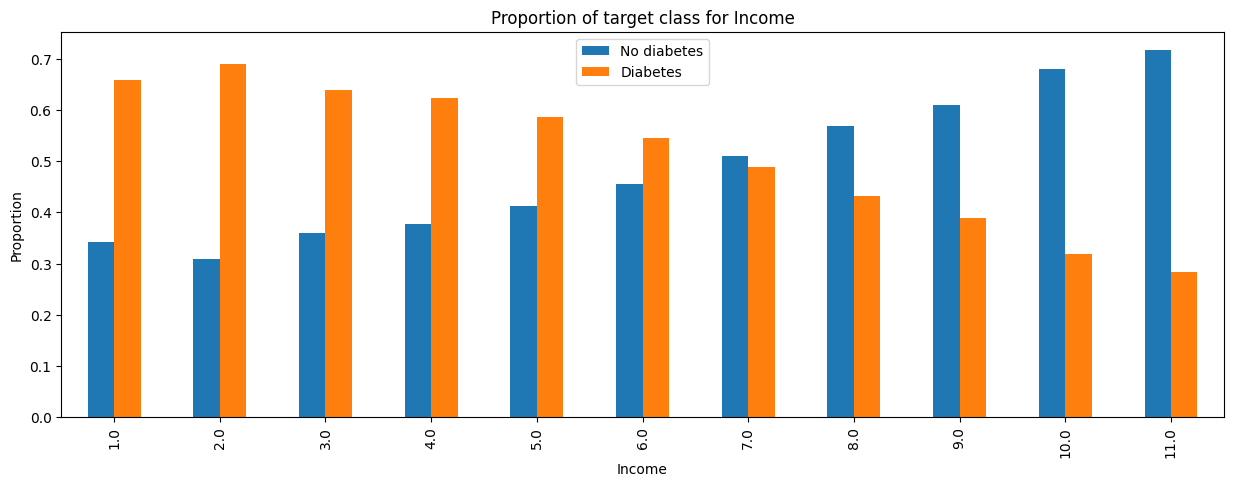

In [45]:
import matplotlib.pyplot as plt

columns = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
           'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
           'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
           'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

for column in columns:
    plot = pd.crosstab(balanced_df[column], balanced_df['Diabetes_binary']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', figsize=(15, 5))
    plt.title(f'Proportion of target class for {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    
    legend = plot.legend()
    legend.texts[0].set_text('No diabetes')
    legend.texts[1].set_text('Diabetes')
    
    plt.show()

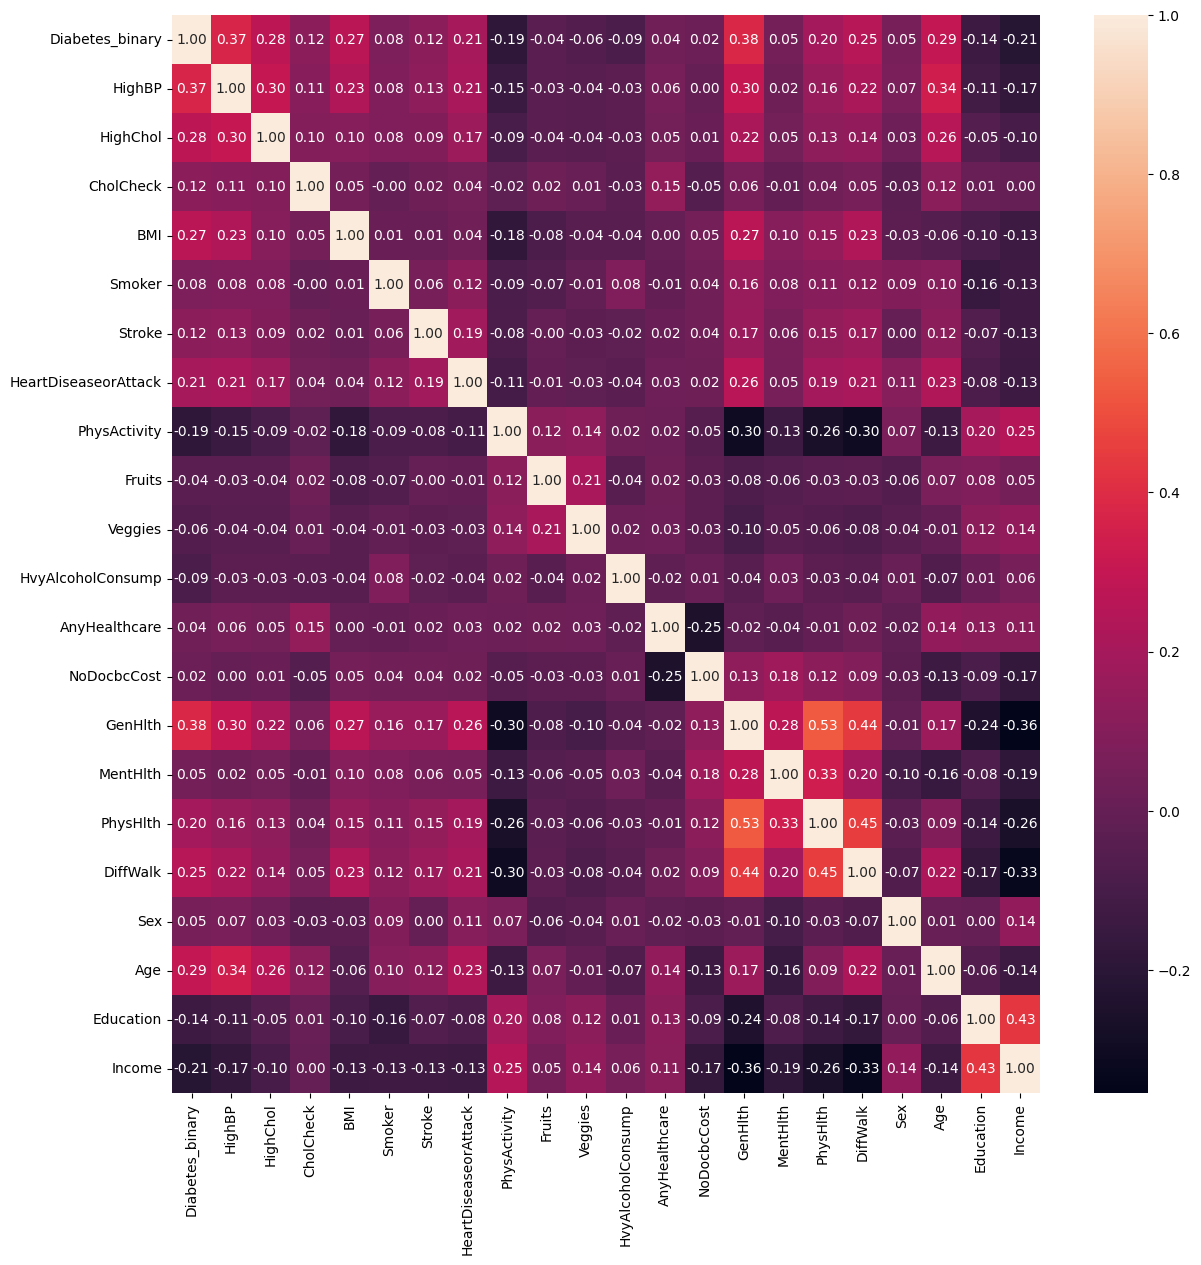

In [46]:
corr = balanced_df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

c:\Users\ensar\Desktop\Diabetes-Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


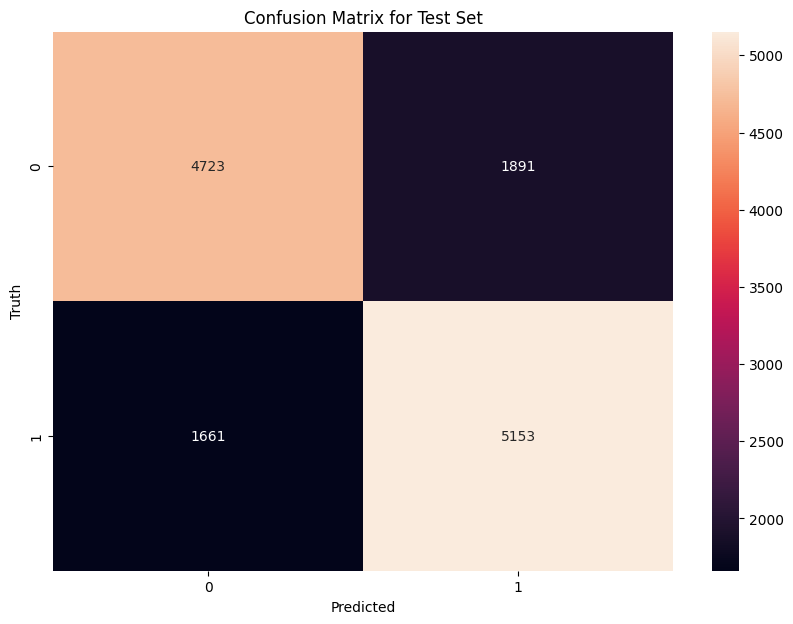

Accuracy: 0.74
Precision: 0.73
Recall: 0.76
F1 Score: 0.74


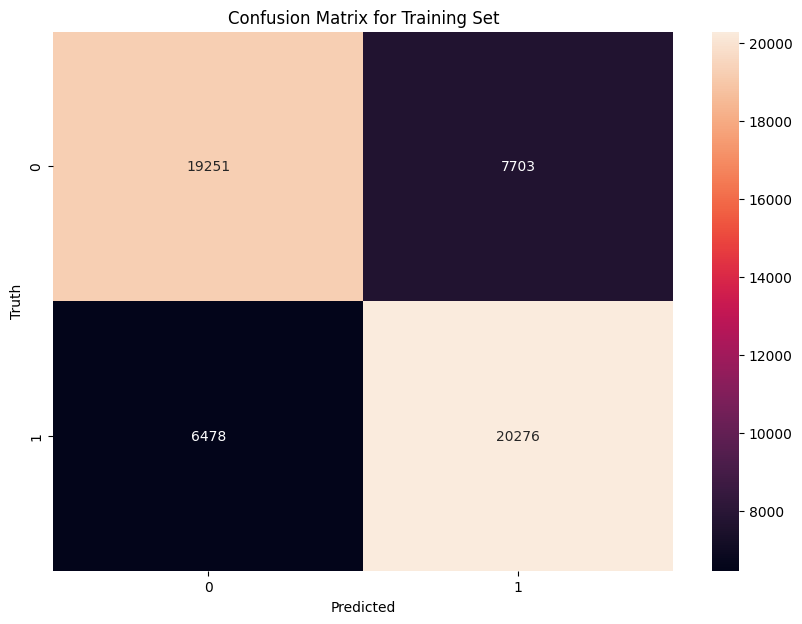

Accuracy: 0.74
Precision: 0.72
Recall: 0.76
F1 Score: 0.74


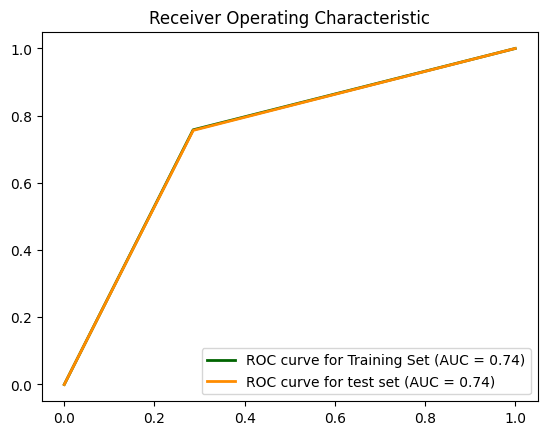

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cmTest = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Test Set')

plt.show()

accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

y_pred_train = model.predict(X_train)

cmTrain = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Training Set')

plt.show()

accuracy = round(accuracy_score(y_train, y_pred_train), 2)
precision = round(precision_score(y_train, y_pred_train), 2)
recall = round(recall_score(y_train, y_pred_train), 2)
f1 = round(f1_score(y_train, y_pred_train), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, color='darkgreen',
         lw=2, label='ROC curve for Training Set (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve for test set (AUC = {:.2f})'.format(roc_auc_test))
plt.legend()
plt.show()


Accuracy: 0.73
Precision: 0.72
Recall: 0.74
F1 Score: 0.73


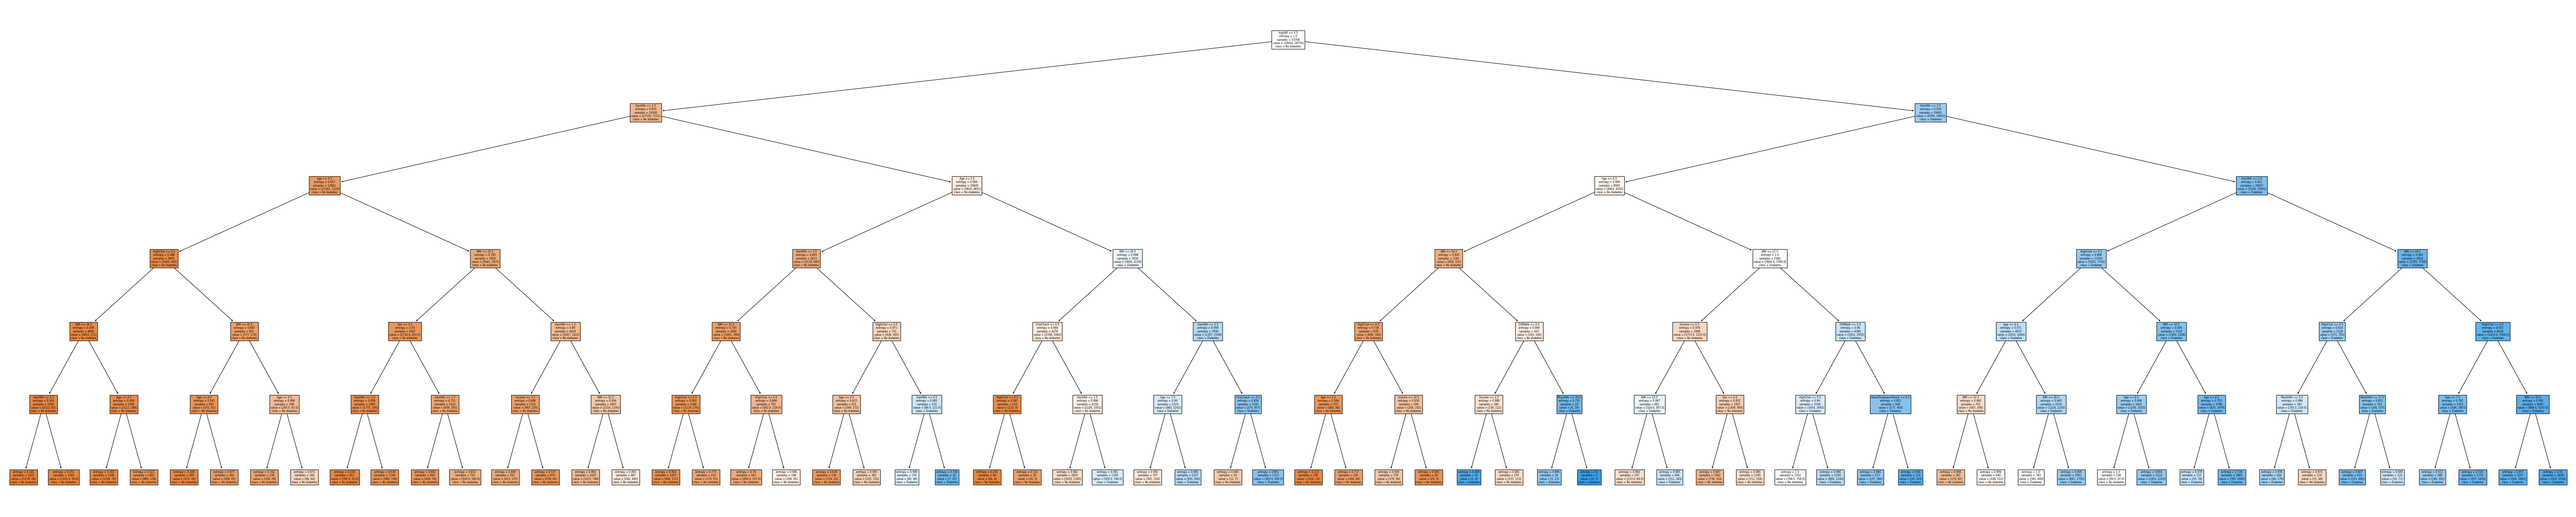

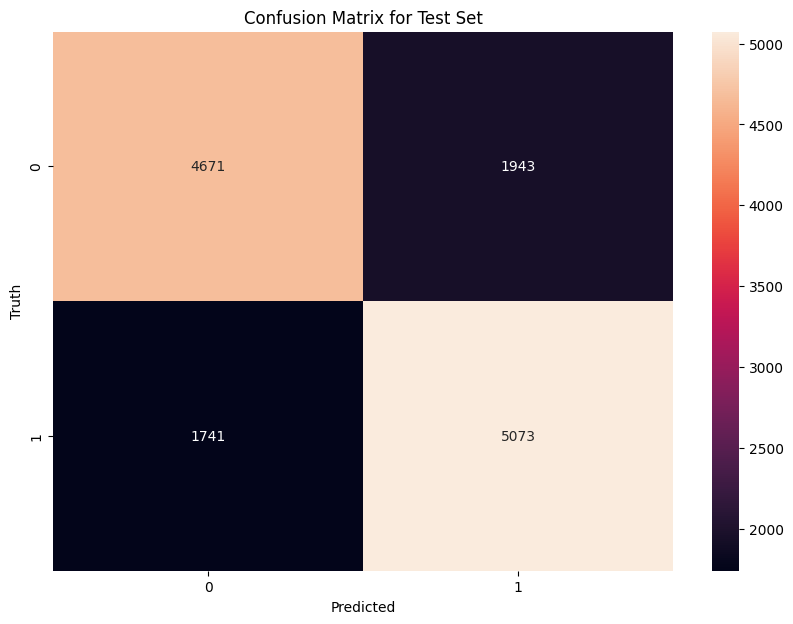

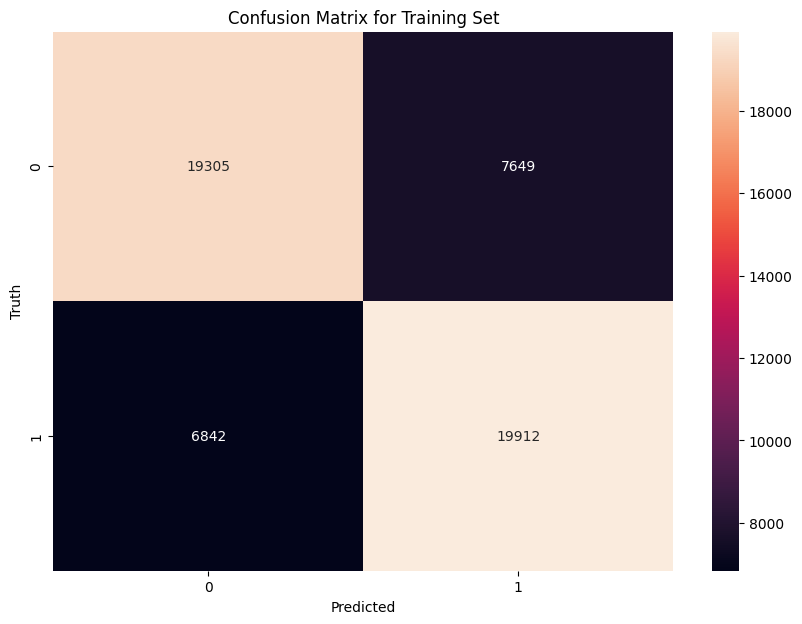

Accuracy: 0.73
Precision: 0.72
Recall: 0.74
F1 Score: 0.73


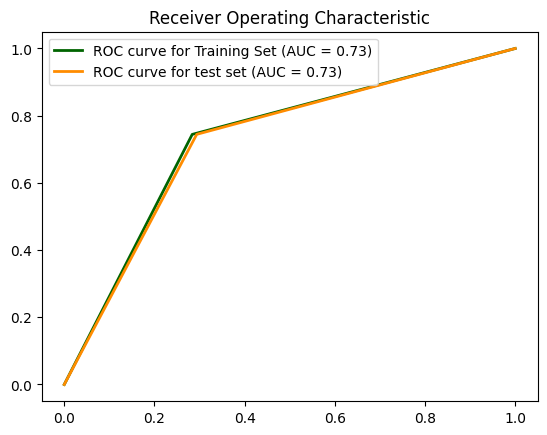

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(random_state=123, criterion="entropy", max_depth=6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
                 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

class_names = ['No diabetes', 'Diabetes']

plt.figure(figsize=(100, 20))
plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

cmTest = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Test Set')

plt.show()

y_pred_train = model.predict(X_train)

cmTrain = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Training Set')

plt.show()

accuracy = round(accuracy_score(y_train, y_pred_train), 2)
precision = round(precision_score(y_train, y_pred_train), 2)
recall = round(recall_score(y_train, y_pred_train), 2)
f1 = round(f1_score(y_train, y_pred_train), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, color='darkgreen',
         lw=2, label='ROC curve for Training Set (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve for test set (AUC = {:.2f})'.format(roc_auc_test))
plt.legend()
plt.show()

Accuracy: 0.69
Precision: 0.68
Recall: 0.71
F1 Score: 0.7


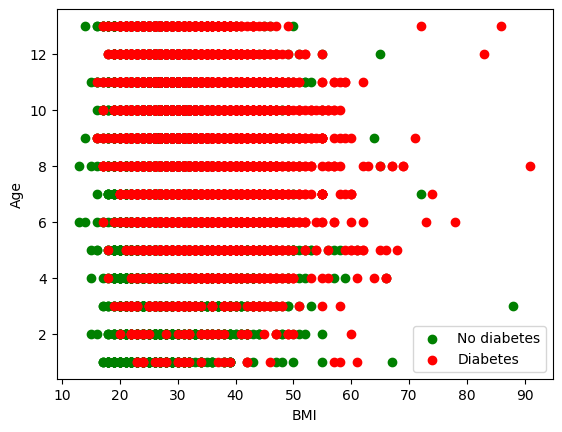

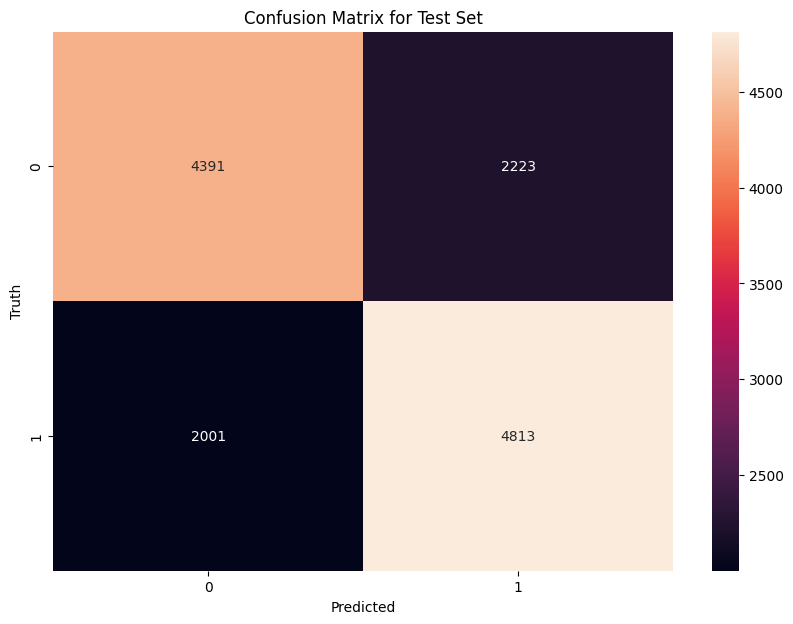

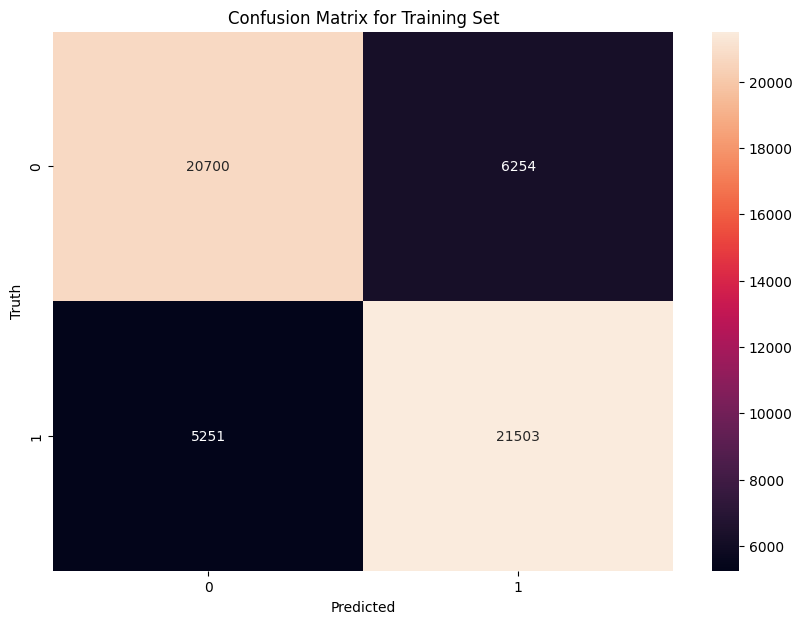

Accuracy: 0.79
Precision: 0.77
Recall: 0.8
F1 Score: 0.79


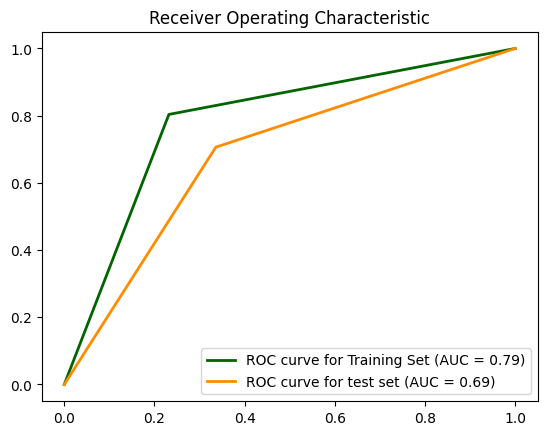

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

feature_1 = X_test['BMI']
feature_2 = X_test['Age']

colors = ['green', 'red']

for i, color in enumerate(colors):
    indices = y_test == i
    plt.scatter(feature_1[indices], feature_2[indices], c=color)

plt.legend(['No diabetes', 'Diabetes'])
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

cmTest = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Test Set')

plt.show()

y_pred_train = model.predict(X_train)

cmTrain = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Training Set')

plt.show()

accuracy = round(accuracy_score(y_train, y_pred_train), 2)
precision = round(precision_score(y_train, y_pred_train), 2)
recall = round(recall_score(y_train, y_pred_train), 2)
f1 = round(f1_score(y_train, y_pred_train), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, color='darkgreen',
         lw=2, label='ROC curve for Training Set (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve for test set (AUC = {:.2f})'.format(roc_auc_test))
plt.legend()
plt.show()

Accuracy: 0.71
Precision: 0.72
Recall: 0.72
F1 Score: 0.72


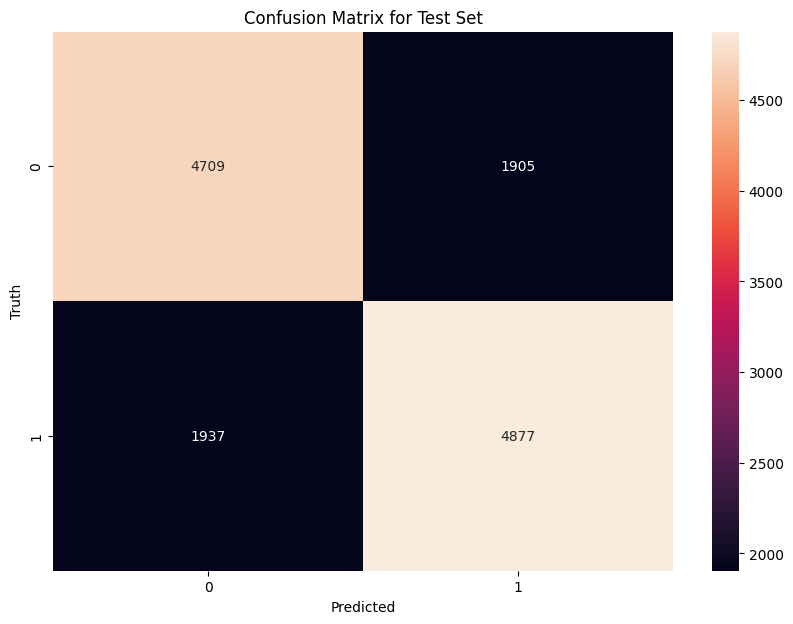

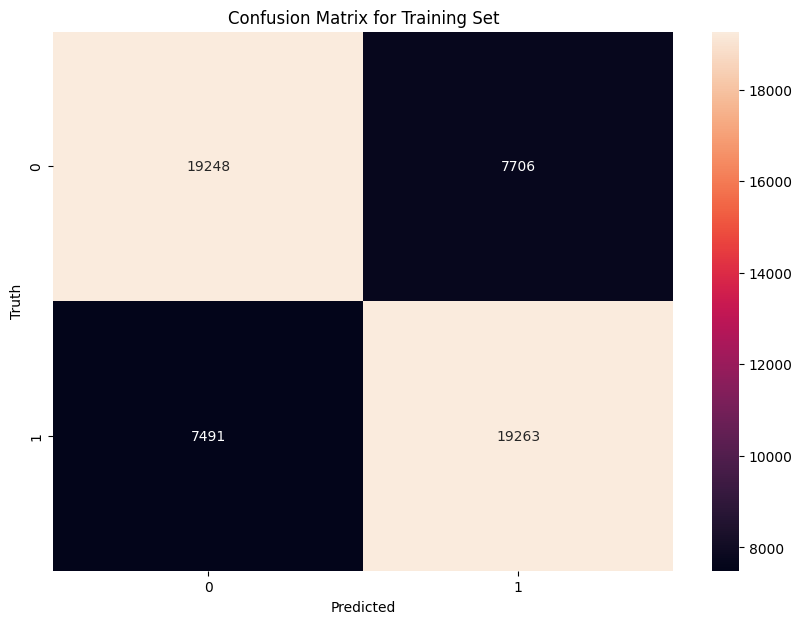

Accuracy: 0.72
Precision: 0.71
Recall: 0.72
F1 Score: 0.72


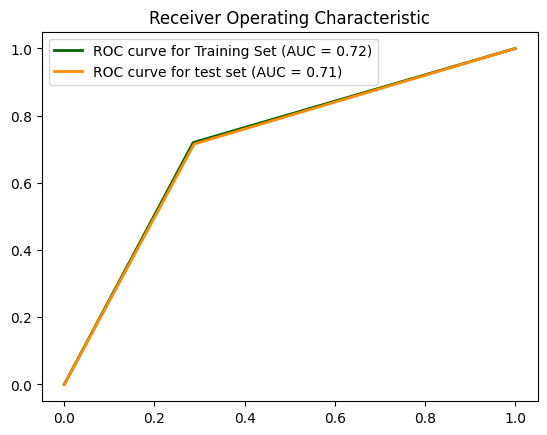

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cmTest = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Test Set')

plt.show()

y_pred_train = model.predict(X_train)

cmTrain = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Training Set')

plt.show()

accuracy = round(accuracy_score(y_train, y_pred_train), 2)
precision = round(precision_score(y_train, y_pred_train), 2)
recall = round(recall_score(y_train, y_pred_train), 2)
f1 = round(f1_score(y_train, y_pred_train), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, color='darkgreen',
         lw=2, label='ROC curve for Training Set (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve for test set (AUC = {:.2f})'.format(roc_auc_test))
plt.legend()
plt.show()

Accuracy: 0.73
Precision: 0.72
Recall: 0.77
F1 Score: 0.74


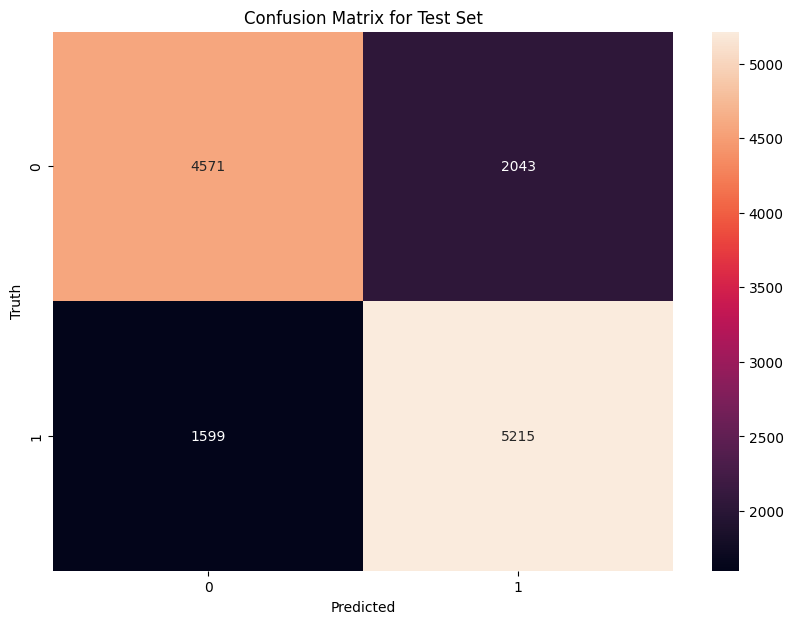

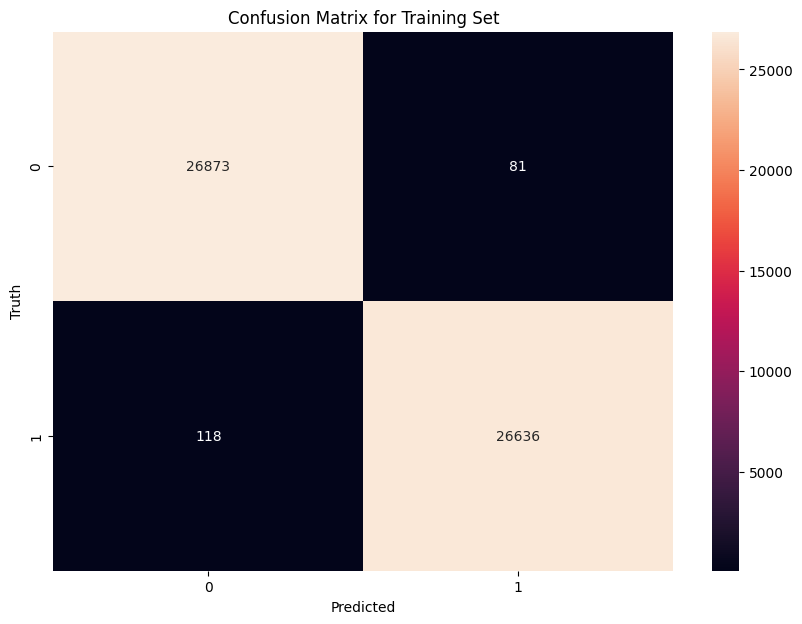

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


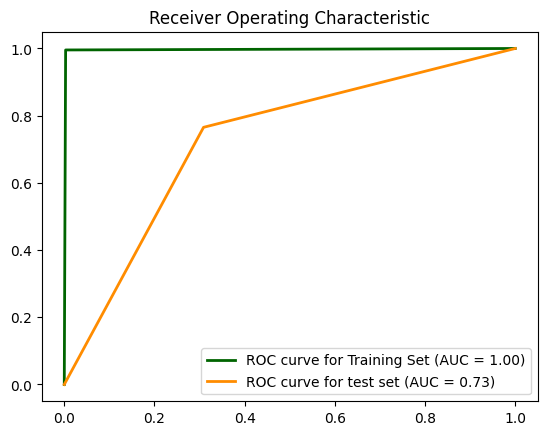

In [51]:
from sklearn.ensemble import RandomForestClassifier as randomForestClassifier
from sklearn.metrics import accuracy_score

model=randomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cmTest = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Test Set')

plt.show()

y_pred_train = model.predict(X_train)

cmTrain = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Confusion Matrix for Training Set')

plt.show()

accuracy = round(accuracy_score(y_train, y_pred_train), 2)
precision = round(precision_score(y_train, y_pred_train), 2)
recall = round(recall_score(y_train, y_pred_train), 2)
f1 = round(f1_score(y_train, y_pred_train), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, color='darkgreen',
         lw=2, label='ROC curve for Training Set (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve for test set (AUC = {:.2f})'.format(roc_auc_test))
plt.legend()
plt.show()